In [156]:
# Importo las librerías que utilizaré a lo largo del proyecto:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [157]:
# Importo el DataSet en cuestión:

df = pd.read_csv("C:/Users/franc/OneDrive/Cursos/Curso Ciencia de Datos UTN - Alternativa Académica/Tareas y proyectos/employees_dataset.csv")

In [158]:
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


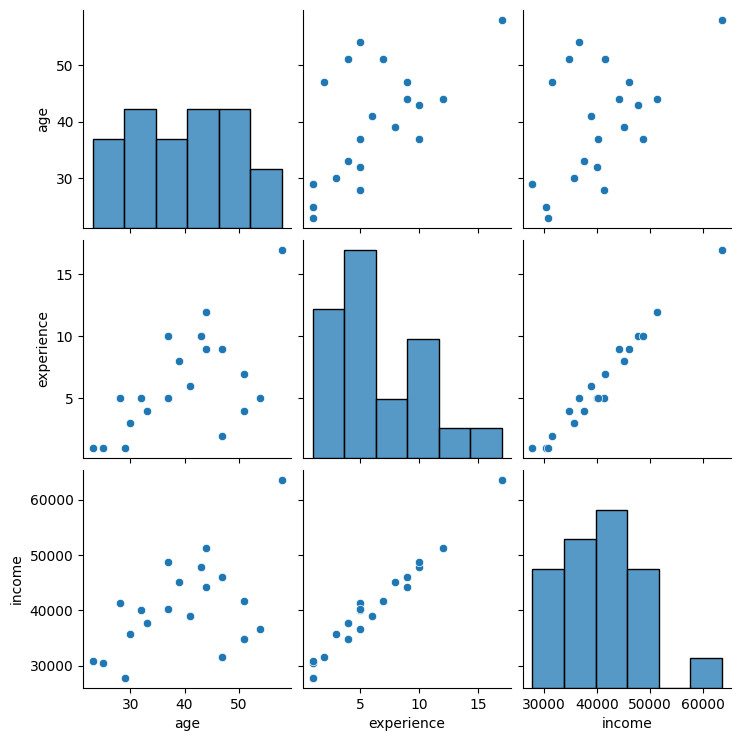

In [159]:
# Realizo un análisis exploratorio para identificar cuales serán
# los Features y cuál el Target Value, y tomar los primeros
# indicios de la correlación de cada uno con este:

sns.pairplot(df)
plt.show()

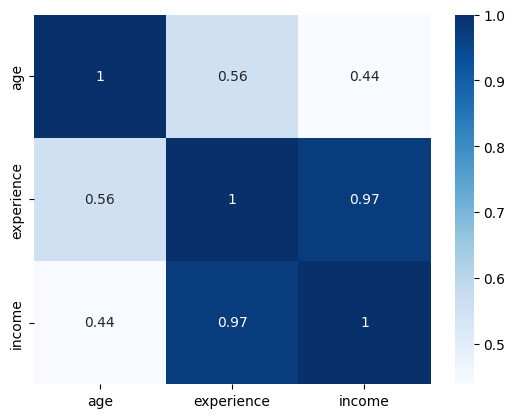

In [160]:
# En los diagramas de dispersión, es evidente la estrecha
# correlación entre la columna con los años de experiencia
# (Será el principal Feature) y la columna de los ingresos
# de los empleados (Será el Target value); reafirmo estas 
# conjeturas con un mapa de calor:

sns.heatmap(df.corr(method='spearman'), annot=True, cmap='Blues')
plt.show()

In [161]:
# Preparo las condiciones para mi Modelo de Regresión Lineal
# Múltiple; asigno los valores correspondientes a cada eje:

X = df[['age','experience']]
Y = df['income']

In [162]:
print("El vector de features es",X.shape,"mientras que el del Target Value",Y.shape)

El vector de features es (20, 2) mientras que el del Target Value (20,)


In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=.7, random_state=4)

In [164]:
X_train.shape

(14, 2)

In [165]:
Y_train.shape

(14,)

In [166]:
X_test.shape

(6, 2)

In [167]:
# Habiéndo comprobado que se tomó el 70% de los regristros de
# entrenamiento, paso a entrenar mi modelo:

model = LinearRegression()

In [168]:
model.fit(X_train,Y_train)

LinearRegression()

In [169]:
# Con esto he creado mi recta (En este caso, hiperplano) a partir de
# los conjuntos X_train e Y_train. 

In [170]:
print("Coeficientes: ",model.coef_)
print("Ordenada al origen", model.intercept_)

Coeficientes:  [ -73.74052308 2173.07700527]
Ordenada al origen 30203.426746642705


In [171]:
pd.DataFrame(model.coef_, ['age','experience'], columns=['Coefficients'])

,Coefficients
age,-73.740523
experience,2173.077005


In [172]:
# He aquí los coeficientes asociados a cada Feature, siendo
# el de la columna de Experiencia la que más incidencia tiene
# sobre el Valor Objetivo, que es el salario del personal,
# reafirmando mi hipótesis. 

In [173]:
# Uso los coeficientes obtenidos y los datos del modelo para
# predecir valores del DataSet

y_pred = model.predict(X_test)
y_pred

array([49205.7974453 , 38709.11503436, 46516.53677846, 39004.07712669,
       35134.96809053, 48763.35430681])

In [174]:
# Paso a calcular los errores:

print("MSE:", mean_squared_error(y_pred,Y_test))
print("R2:", r2_score(y_pred,Y_test))
print("ROOT MEAN SQUARED ERROR:", np.sqrt(mean_squared_error(y_pred,Y_test)))

MSE: 2354568.0127516347
R2: 0.9216267634899293
ROOT MEAN SQUARED ERROR: 1534.4601698159631


In [175]:
# Con esto puedo concluir que el 92% de la varianza se
# explica por la relación de la edad y los años de 
# experiencia del empleado con su sueldo.

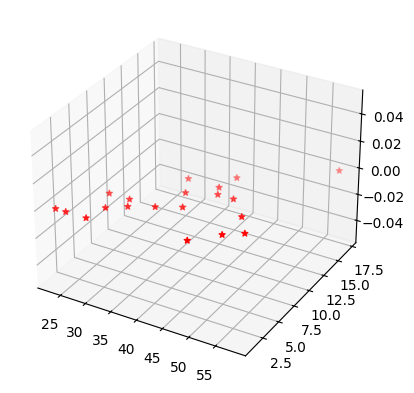

In [176]:
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
ax1.scatter(X['age'],X['experience'],c='r', marker='*')
plt.show()

In [177]:
# A continuación, pasaré a corroborar si la predicción
# de los ingresos de los empleados es más precisa
# teniendo en cuenta solamente sus años de experiencia,
# dado que es un feature que parece tener casi el doble
# de repercución sobre el Target Value respecto a la
# edad neta del personal. 

In [178]:
X = df.drop(columns=['age'])
Y = df['income']

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

In [180]:
model.fit(X_train,Y_train)

LinearRegression()

In [181]:
y_pred = model.predict(X_test)
y_pred

array([48700., 40130., 44190., 41340., 34800., 47830.])

In [182]:
print("MSE:", mean_squared_error(y_pred,Y_test))
print("ROOT MEAN SQUARED ERROR:", np.sqrt(mean_squared_error(y_pred,Y_test)))
print("R2:", r2_score(y_pred,Y_test))

MSE: 2.6469779601696886e-23
ROOT MEAN SQUARED ERROR: 5.1448789686149945e-12
R2: 1.0


In [183]:
# Como es evidente, bajó el error y aumentó el R2 (Hasta el
# 100%), comprobando que es suficiente utilizar solamente los
# años de experiencia del sujeto contratado y no sumar al 
# cálculo sus años vividos. 